# **KLASIFIKASI GERAK PUKULAN BULU TANGKIS BERBASIS SPEKTROGRAM MENGGUNAKAN METODE CONVOLUTIONAL NEURAL NETWORK**

# **Menghubungkan Google Drive ke Google Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Mengimport Libraries Yang dibutuhkan**

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.transform import resize
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model

# **Load Model**

In [ ]:
# --- Load model ---
model_path = '/content/drive/My Drive/TUGAS AKHIR/_DATASET_/Final_1.h5'
model = load_model(model_path)

In [ ]:
# --- Fungsi: Ekstrak audio dari video ---
def extract_audio_from_video(video_path):
    import moviepy.editor as mp
    video = mp.VideoFileClip(video_path)
    audio_path = "/content/extracted_audio.wav"
    video.audio.write_audiofile(audio_path, verbose=False, logger=None)
    return audio_path

# --- Fungsi: Convert audio jadi spektrogram ---
def audio_to_spectrogram(audio_path, target_shape=(128, 88)):
    audio_data, sample_rate = librosa.load(audio_path, sr=None)
    spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    spectrogram_resized = resize(spectrogram_db, target_shape)
    spectrogram_resized = np.expand_dims(spectrogram_resized, axis=-1)
    return spectrogram_resized

# --- Fungsi: Klasifikasi video ---
def classify_video(video_path, model):
    audio_path = extract_audio_from_video(video_path)
    spectrogram = audio_to_spectrogram(audio_path)
    spectrogram = np.expand_dims(spectrogram, axis=0)
    prediction = model.predict(spectrogram)
    predicted_class = np.argmax(prediction)
    return class_names[predicted_class], prediction[0][predicted_class]


In [ ]:
# --- Evaluasi model dengan dataset uji ---
test_dirs = [
    '/content/drive/My Drive/TUGAS AKHIR/_DATASET_/Data-Test/Video Test 1',
    '/content/drive/My Drive/TUGAS AKHIR/_DATASET_/Data-Test/Video Test 2',
    '/content/drive/My Drive/TUGAS AKHIR/_DATASET_/Data-Test/Video Test 3',
    '/content/drive/My Drive/TUGAS AKHIR/_DATASET_/Data-Test/Video Test 4'
]

# --- Label kelas ---
class_names = ['Smash', 'Dropshot']

# --- Dictionary untuk simpan hasil tiap test folder ---
results = {}

for test_dir in test_dirs:
    y_true = []
    y_pred = []
    test_name = os.path.basename(test_dir)

    print(f"\n--- Memproses video dari: {test_name} ---")

    for label_idx, label_name in enumerate(class_names):
        folder_path = os.path.join(test_dir, label_name)
        if not os.path.exists(folder_path):
            print(f"Folder tidak ditemukan: {folder_path}")
            continue
        for video_file in os.listdir(folder_path):
            if video_file.lower().endswith('.mp4'):
                video_path = os.path.join(folder_path, video_file)
                print(f"Memproses: {video_path}")
                try:
                    pred_label, confidence = classify_video(video_path, model)
                    y_true.append(label_idx)
                    y_pred.append(class_names.index(pred_label))
                except Exception as e:
                    print(f"Gagal memproses {video_path}: {e}")

    # Simpan hasil
    results[test_name] = {
        'y_true': y_true,
        'y_pred': y_pred
    }


--- Memproses video dari: Video Test 1 ---
Memproses: /content/drive/My Drive/TUGAS AKHIR/_DATASET_/Data-Test/Video Test 1/Smash/Test-S-1.mp4


  if event.key is 'enter':



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
Memproses: /content/drive/My Drive/TUGAS AKHIR/_DATASET_/Data-Test/Video Test 1/Smash/Test-S-2.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
Memproses: /content/drive/My Drive/TUGAS AKHIR/_DATASET_/Data-Test/Video Test 1/Smash/Test-S-3.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Memproses: /content/drive/My Drive/TUGAS AKHIR/_DATASET_/Data-Test/Video Test 1/Smash/Test-S-4.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Memproses: /content/drive/My Drive/TUGAS AKHIR/_DATASET_/Data-Test/Video Test 1/Smash/Test-S-5.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Memproses: /content/drive/My Drive/TUGAS AKHIR/_DATASET_/Data-Test/Video Test 1/Smash/Test-S-7.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Memproses: /content/drive/My Drive/TUGAS AKHIR/_DATASET_/Data-Test/Video Test 1/Smash/Test-S-8.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Memproses: /content/drive/My Drive/TUGAS AKHIR/_DATASET_/Data-Test/Video Test 1/Smash/Test-S-9.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
M


=== Confusion Matrix & Classification Report: Video Test 1 ===


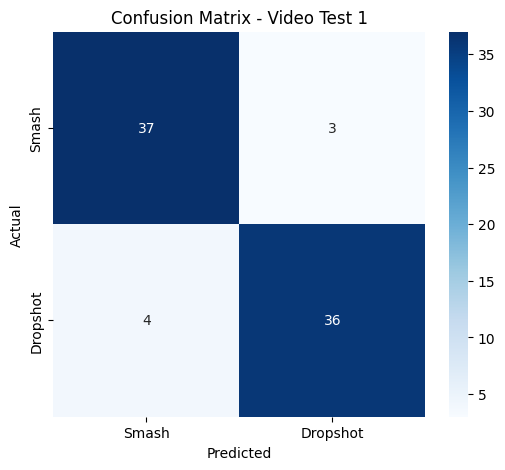

Classification Report - Video Test 1:
              precision    recall  f1-score   support

       Smash     0.9024    0.9250    0.9136        40
    Dropshot     0.9231    0.9000    0.9114        40

    accuracy                         0.9125        80
   macro avg     0.9128    0.9125    0.9125        80
weighted avg     0.9128    0.9125    0.9125        80


=== Confusion Matrix & Classification Report: Video Test 2 ===


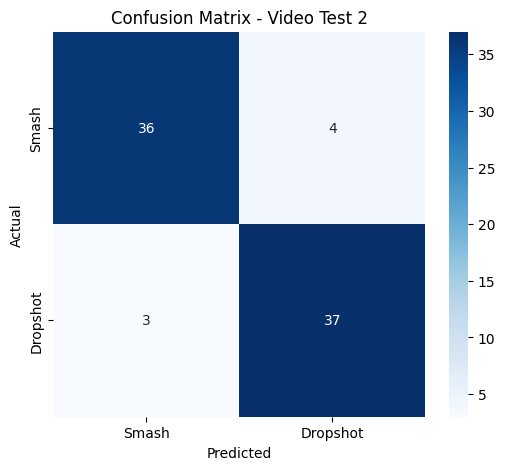

Classification Report - Video Test 2:
              precision    recall  f1-score   support

       Smash     0.9231    0.9000    0.9114        40
    Dropshot     0.9024    0.9250    0.9136        40

    accuracy                         0.9125        80
   macro avg     0.9128    0.9125    0.9125        80
weighted avg     0.9128    0.9125    0.9125        80


=== Confusion Matrix & Classification Report: Video Test 3 ===


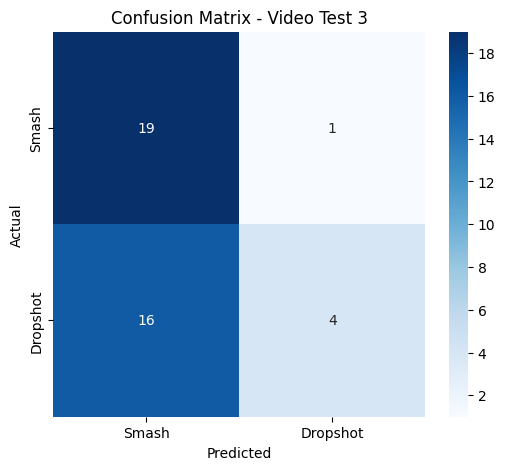

Classification Report - Video Test 3:
              precision    recall  f1-score   support

       Smash     0.5429    0.9500    0.6909        20
    Dropshot     0.8000    0.2000    0.3200        20

    accuracy                         0.5750        40
   macro avg     0.6714    0.5750    0.5055        40
weighted avg     0.6714    0.5750    0.5055        40


=== Confusion Matrix & Classification Report: Video Test 4 ===


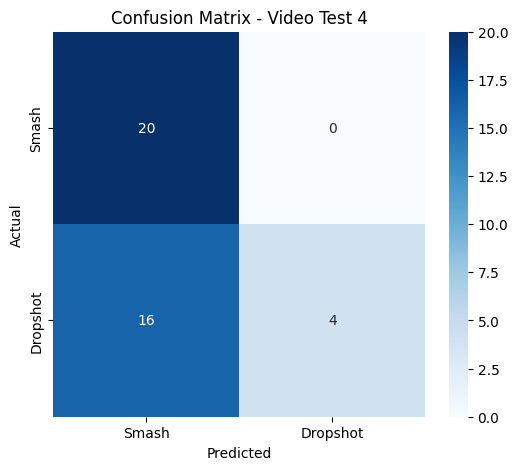

Classification Report - Video Test 4:
              precision    recall  f1-score   support

       Smash     0.5556    1.0000    0.7143        20
    Dropshot     1.0000    0.2000    0.3333        20

    accuracy                         0.6000        40
   macro avg     0.7778    0.6000    0.5238        40
weighted avg     0.7778    0.6000    0.5238        40



In [ ]:
# --- Evaluasi (CM + Report) berdasarkan hasil yang sudah disimpan ---
for test_name, data in results.items():
    y_true = data['y_true']
    y_pred = data['y_pred']

    print(f"\n=== Confusion Matrix & Classification Report: {test_name} ===")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {test_name}')
    plt.show()

    # Classification Report
    print(f"Classification Report - {test_name}:")
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))